In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/raw_traffic_data.csv', sep='[,;:]' ,index_col=False)
data.head(10)

/tmp/ipykernel_8144/530576682.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('../data/raw_traffic_data.csv', sep='[,;:]' ,index_col=False)
/tmp/ipykernel_8144/530576682.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  data = pd.read_csv('../data/raw_traffic_data.csv', sep='[,;:]' ,index_col=False)


,track_id,type,traveled_d,avg_speed,lat,lon,speed,lon_acc,lat_acc,time
0,1,Motorcycle,407.14,35.749151,37.991616,23.731814,35.5115,-0.0375,-0.0134,0.0
1,2,Motorcycle,408.06,3.138953,37.991032,23.732130,0.0000,0.0000,0.0000,0.0
2,3,Car,261.46,3.668181,37.990242,23.731972,0.0000,0.0000,0.0000,0.0
3,4,Motorcycle,538.67,14.825672,37.992507,23.731268,3.1133,-0.0124,0.0724,0.0
4,5,Motorcycle,466.41,30.979508,37.990528,23.732035,35.9998,-0.1989,-0.0301,0.0
5,6,Bus,24.36,8.596841,37.990243,23.730862,0.0000,0.0000,0.0000,0.0
6,7,Car,17.21,10.323055,37.990175,23.730824,0.0037,0.0052,-0.0000,0.0
7,8,Motorcycle,18.53,11.913530,37.990183,23.730857,0.0025,0.0035,-0.0000,0.0
8,9,Car,16.65,8.325527,37.990162,23.730891,0.0000,-0.0000,-0.0000,0.0
9,10,Car,22.38,8.392611,37.990218,23.730907,0.0000,0.0000,0.0000,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110 entries, 0 to 2109
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   track_id     2110 non-null   int64  
 1    type        2110 non-null   object 
 2    traveled_d  2110 non-null   float64
 3    avg_speed   2110 non-null   float64
 4    lat         2110 non-null   float64
 5    lon         2110 non-null   float64
 6    speed       2110 non-null   float64
 7    lon_acc     2110 non-null   float64
 8    lat_acc     2110 non-null   float64
 9    time        2110 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 165.0+ KB


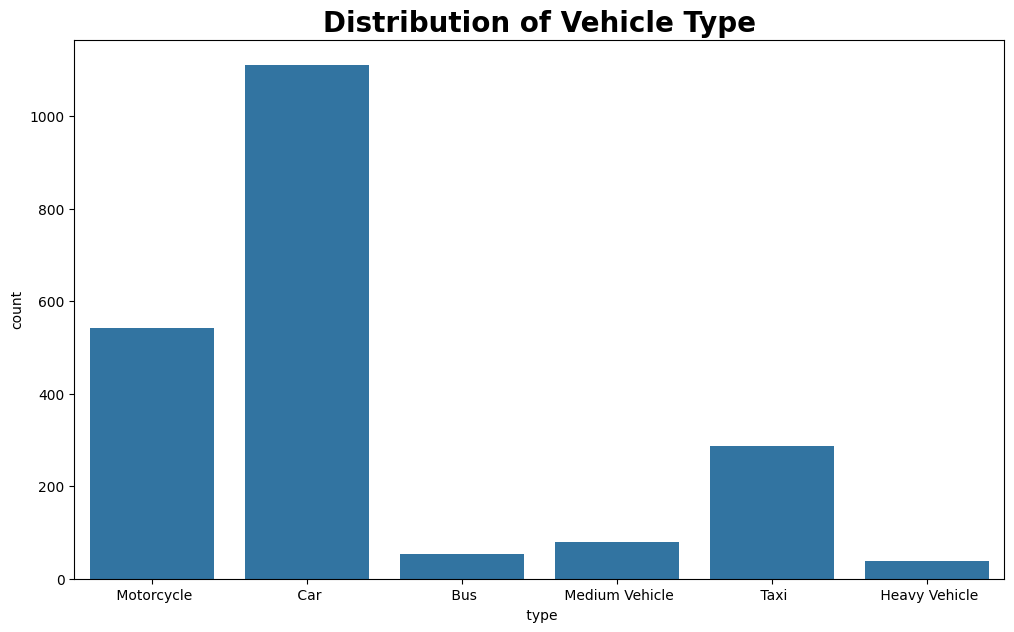

In [4]:
plt.figure(figsize=(12, 7))
sns.countplot(data=data, x=" type")
plt.title(f'Distribution of Vehicle Type', size=20, fontweight='bold')
plt.show()

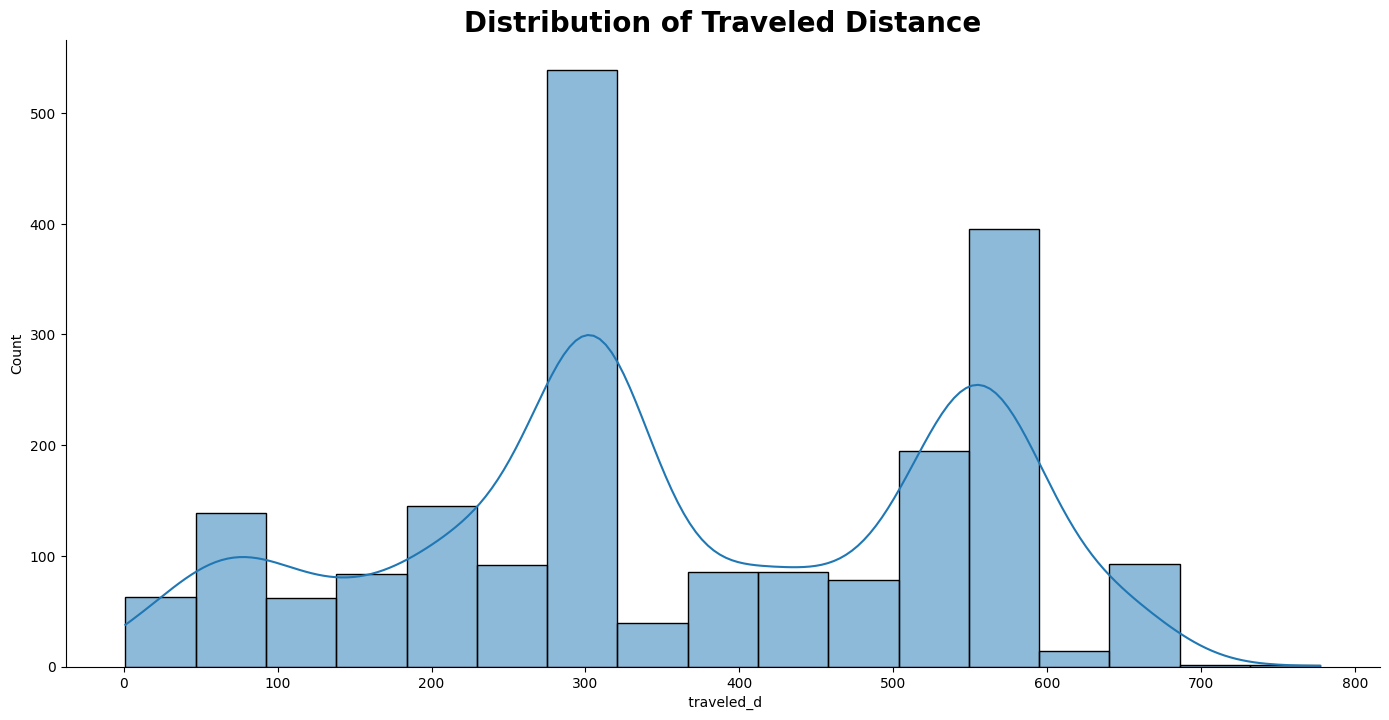

In [5]:
sns.displot(data=data, x=" traveled_d",
                    kde=True, height=7, aspect=2)
plt.title(f'Distribution of Traveled Distance', size=20, fontweight='bold')
plt.show()

In [6]:
with open("../data/raw_traffic_data.csv", 'r') as file:
    lines = file.readlines()
print(f"The number of rows/lines is {len(lines)}")

The number of rows/lines is 2111


In [7]:
print(lines[0]) # column names
print(lines[0].strip('\n').strip().strip(';').split(';')) # columns names as a list

track_id; type; traveled_d; avg_speed; lat; lon; speed; lon_acc; lat_acc; time

['track_id', ' type', ' traveled_d', ' avg_speed', ' lat', ' lon', ' speed', ' lon_acc', ' lat_acc', ' time']


In [8]:
lines_as_lists = [line.strip('\n').strip().strip(';').split(';') for line in lines]
len(lines_as_lists)

2111

In [9]:
print(f"the number of fields in row 1 is {len(lines_as_lists[1])}, row 2 is {len(lines_as_lists[2])}")

the number of fields in row 1 is 6160, row 2 is 70210


In [10]:
no_field_max = 0

for row in lines_as_lists:
    if len(row) > no_field_max:
        no_field_max = len(row)

print(f"the maximum number of fields is {no_field_max}")
largest_n = int((no_field_max-4)/6)
print(f"the largest n = {largest_n}")

the maximum number of fields is 124180
the largest n = 20696


In [11]:
cols = lines_as_lists.pop(0)

In [15]:
vehicle_cols = cols[:4]
trajectory_cols = ['track_id'] + cols[4:]

print(vehicle_cols)
trajectory_cols

['track_id', ' type', ' traveled_d', ' avg_speed']


['track_id', ' lat', ' lon', ' speed', ' lon_acc', ' lat_acc', ' time']

In [16]:
track_info = []
trajectory_info = []

for row in lines_as_lists:
    track_id = row[0]

    # add the first 4 values to track_info
    track_info.append(row[:4]) 

    remaining_values = row[4:]
    # reshape the list into a matrix and add track_id
    trajectory_matrix = [ [track_id] + remaining_values[i:i+6] for i in range(0,len(remaining_values),6)]
    # add the matrix rows to trajectory_info
    trajectory_info = trajectory_info + trajectory_matrix


In [17]:
df_track = pd.DataFrame(data= track_info,columns=vehicle_cols)
df_track.head()

,track_id,type,traveled_d,avg_speed
0,1,Motorcycle,407.14,35.749151
1,2,Motorcycle,408.06,3.138953
2,3,Car,261.46,3.668181
3,4,Motorcycle,538.67,14.825672
4,5,Motorcycle,466.41,30.979508


In [22]:
df_track.shape

(2110, 4)

In [18]:
df_trajectory = pd.DataFrame(data= trajectory_info,columns=trajectory_cols)

df_trajectory.head()

,track_id,lat,lon,speed,lon_acc,lat_acc,time
0,1,37.991616,23.731814,35.5115,-0.0375,-0.0134,0.000000
1,1,37.991615,23.731818,35.5094,0.0089,-0.0154,0.040000
2,1,37.991615,23.731823,35.5128,0.0375,-0.0174,0.080000
3,1,37.991614,23.731827,35.5202,0.0661,-0.0194,0.120000
4,1,37.991613,23.731832,35.5338,0.1215,-0.0213,0.160000


In [21]:
df_trajectory.shape

(3962815, 7)